**Overview**

The risk of developing breast cancer is continouslly emmerging.The early detection of it in the patient can surrelly increase the survival rate.
In this project I am to develop a machine learning model that can be used to which could classify tumours present in a patient that could eventually result in breast cancer.

Values present in the dataset includes tumor radius which is mainly the distances from center to points on the perimeter,texture as in standard deviation of gray-scale values, perimeter, area, smoothness indicating the local variation in radius lengths, compactness i.e perimeter² / area — 1.0, concavity as in severity of concave portions of the contour, concave points or number of concave portions of the contour, symmetry and fractal dimension.

**Imports**

In [1]:
"""""
The block of code imports all the packages needed for the
functionality of this project.
"""""
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.express as px
from datetime import datetime # Provides classes for working with dates and times.
import os, sys
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
%matplotlib inline
# The following commands are used for auto reloading of the notebook when changes are made.
%reload_ext autoreload
%autoreload 2

In [2]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
def get_prediction(classifier, X_train, X_test, y_train, y_test):

    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(" Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print(" Confusion Matrix: \n", cm)
    print(" Classification Report: \n", classification_report(y_test, y_pred))

In [4]:
df = pd.read_csv('data.csv') # Creating a dataframe.

In [5]:
df.shape # Examining the shape of the data.

(569, 33)

In [6]:
df.columns #  Examining the column names.

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Analysing Data**

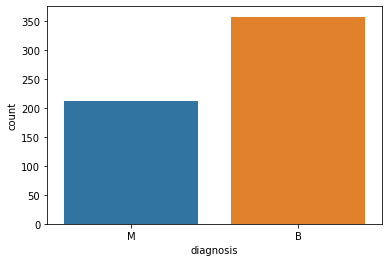

In [8]:
"""
This block of code drops the column with all missing values (na, NAN, NaN) i.e Unnamed: 32 column.
Moreover it plots count of the number of "M" refering to Malignant while "B" to  Benign tumors type.
"""
df = df.dropna(axis=1) 
df['diagnosis'].value_counts() 
sns.countplot(df['diagnosis'],label="Count") 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

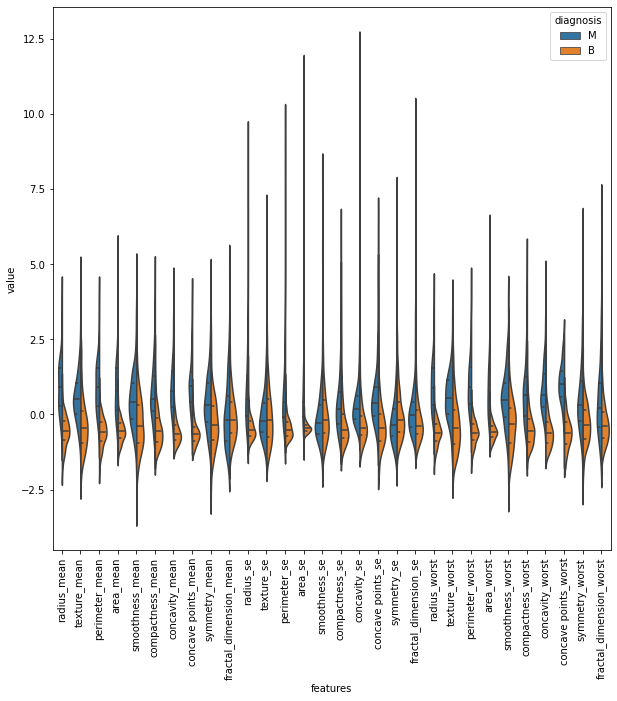

In [9]:
"""
This block of Plots a violin graph to asses distribution 
of features in terms of weither it would be good a fit
for classification or not.for example as per the graph 
the median value of texture_mean for Malignant and 
Benign looks separated, so it might be a good feature 
for classification while on the other hand for the 
feature fractal_dimension_mean, medians in regards to the
Malignant and Benign groups are very close to each 
other.
"""
y = df.diagnosis # y includes diagnosis column with M or B values.

# The following lines of code drops the columns 'id' and 'diagnosis' as it is does not convey any useful info and the aim of the project is to separate labels and features.
altered_list = ['id','diagnosis']
X = df.drop(altered_list,axis = 1) # X includes our features

data_dia = y
data = X
data_std = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_std.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name="value")
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In order to This block of code plot a heatmap to 



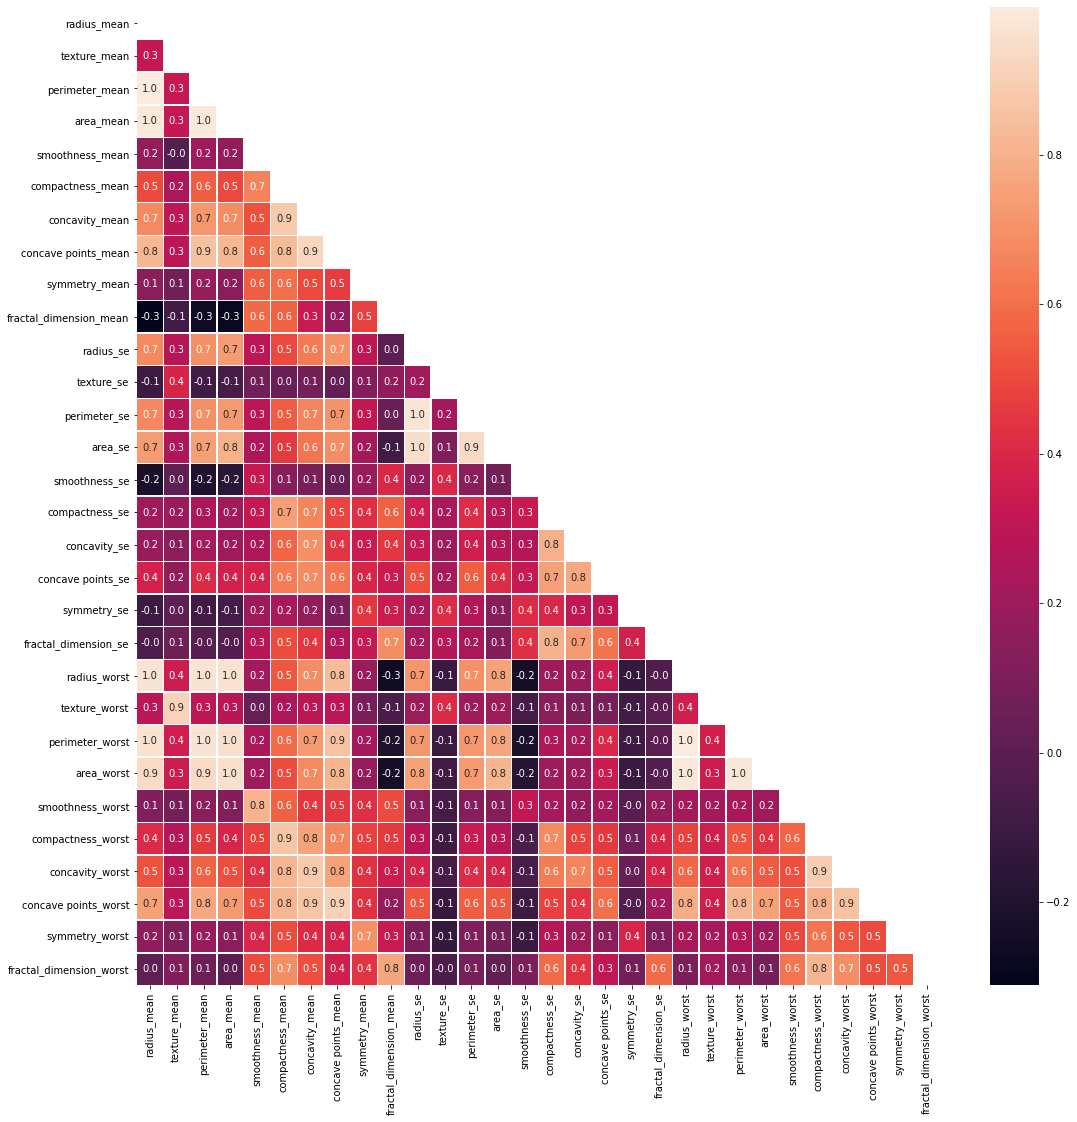

In [10]:
"""
This block of code plot a heatmap to asses
the correlation between the features, as it is quite 
effective in summarizing a large amount of data interms of observing patterns.
"""

f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [11]:
"""
This block of code outputs a table of t test values
that emphasises on how significant the differences 
between the groups are.
"""
data= {"t-statistic":[],"p-value" : []}
for column in df.columns[2:]:
    new = pd.DataFrame(data=df[[column, 'diagnosis']])
    new = new.set_index('diagnosis')
    values=stats.ttest_ind(new.loc['M'], new.loc['B'])
    data["t-statistic"].append(values[0][0])
    data["p-value"].append(values[1][0])
row_labels = df.columns[2:]
pd.DataFrame(data=data, index=row_labels)

,t-statistic,p-value
radius_mean,25.435822,8.465941e-96
texture_mean,10.867201,4.058636e-25
perimeter_mean,26.405213,8.436251e-101
area_mean,23.938687,4.734564e-88
smoothness_mean,9.146099,1.051850e-18
compactness_mean,17.698392,3.938263e-56
concavity_mean,23.103963,9.966556e-84
concave points_mean,29.354319,7.101150e-116
symmetry_mean,8.338312,5.733384e-16
fractal_dimension_mean,-0.305711,7.599368e-01


**Preprocessing**

In [12]:
"""
This block of code drops features which have
high correlations among them i.e ‘perimeter_mean’, 
‘area_mean’, ‘perimeter_se’, ‘area_se’, ‘radius_worst’,
‘perimeter_worst’, ‘area_worst’ were amongst the features
that were dropped.

"""

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # Selecting an upper triangle of correlation matrix.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] # Finding the index of feature columns with correlation greater than 0.95.
X = X.drop(X[to_drop], axis=1) # Dropping feature columns.
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Train/Test Split**

In [13]:
"""
This block of code spits feature sets and 
their relevant labels into training and testing datasets.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)

**Encoding**

In [14]:
"""
This block of code encodes labels in numeric values.
"""
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)

**Scalling**


In [15]:
"This block of code scales the features"
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Classification**

In [16]:
classifiers = [LogisticRegression(), SGDClassifier(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]

for classifier in classifiers:
    print("\n\n", classifier)
    get_prediction(classifier, X_train, X_test, y_train, y_test)



 LogisticRegression()
 Accuarcy: 98.68
 Confusion Matrix: 
 [[142   1]
 [  2  83]]
 Classification Report: 
               precision    recall  f1-score   support

           B       0.99      0.99      0.99       143
           M       0.99      0.98      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228



 SGDClassifier()
 Accuarcy: 96.05
 Confusion Matrix: 
 [[136   7]
 [  2  83]]
 Classification Report: 
               precision    recall  f1-score   support

           B       0.99      0.95      0.97       143
           M       0.92      0.98      0.95        85

    accuracy                           0.96       228
   macro avg       0.95      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



 BernoulliNB()
 Accuarcy: 85.53
 Confusion Matrix: 
 [[116  27]
 [  6  79]]
 Classification Report: 
               precision  